In [ ]:
# !pip3 install twint

!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
import twint
import pandas as pd
import numpy as np
import nest_asyncio
import networkx as nx
import matplotlib as plt
nest_asyncio.apply()

In [ ]:
c = twint.Config()

c.Search = "rip Prince Philip"
c.Limit = 5000
c.Store_csv = True
c.Output = "tweetx.csv"

twint.run.Search(c)

Streaming output truncated to the last 5000 lines.
1381609992462172160 2021-04-12 14:07:45 +0000 <Frankie20101> @ukmedicx You got me there, I was just taking a drink of tea 😂😂🤣  https://t.co/JHqMu8MnD5
1381609850459803649 2021-04-12 14:07:12 +0000 <909_Art> RIP Prince Philip.  😔 A touching tribute by @GraemeBandeira
1381609779831902209 2021-04-12 14:06:55 +0000 <numz_i> @SkyNews It took the death of Prince Philip For Boris Johnson to finally get his hair cut 💇‍♂️   RIP Prince Philip 🤴
1381609771166490629 2021-04-12 14:06:53 +0000 <sophiehnnh> Harry really is like one of those people who spent the summer posting BLM infographics but then posted "RIP Prince Philip 😔💔"
1381609401149222919 2021-04-12 14:05:24 +0000 <GemHesk> @Class5StCharles Ahh Well done Arlen👏 RIP Prince Philip, thank you for all you have done for our Country. Our thoughts and prayers are with your family at this time x
1381608550837989378 2021-04-12 14:02:02 +0000 <JosephCornforth> Very moving tribute by Prince Harry. H

In [ ]:
tweets=pd.read_csv("tweetx.csv")
tweets

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381609992462172160,1381595695833055237,2021-04-12 14:07:45 UTC,2021-04-12,14:07:45,0,806465925000077312,frankie20101,frankie20101 RIP PRINCE PHILIP,NaN,"@ukmedicx You got me there, I was just taking ...",en,[],[],['https://pbs.twimg.com/tweet_video_thumb/Eyx2...,0,0,0,[],[],https://twitter.com/Frankie20101/status/138160...,False,NaN,1,https://pbs.twimg.com/tweet_video_thumb/Eyx26o...,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ukmedicx', 'name': 'medicman...",NaN,NaN,NaN,NaN
1,1381609850459803649,1381609850459803649,2021-04-12 14:07:12 UTC,2021-04-12,14:07:12,0,42384748,909_art,909art.co.uk💙,NaN,RIP Prince Philip. 😔 A touching tribute by @G...,en,"[{'screen_name': 'graemebandeira', 'name': 'gr...",[],[],0,0,0,[],[],https://twitter.com/909_Art/status/13816098504...,False,https://twitter.com/GraemeBandeira/status/1381...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381609779831902209,1381608432269205507,2021-04-12 14:06:55 UTC,2021-04-12,14:06:55,0,1264196488944660482,numz_i,Numaan,NaN,@SkyNews It took the death of Prince Philip Fo...,en,[],[],[],0,0,0,[],[],https://twitter.com/numz_i/status/138160977983...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'SkyNews', 'name': 'Sky News'...",NaN,NaN,NaN,NaN
3,1381609771166490629,1381608866048323585,2021-04-12 14:06:53 UTC,2021-04-12,14:06:53,0,708752332440395776,sophiehnnh,soapy 😇,NaN,Harry really is like one of those people who s...,en,[],[],[],0,0,0,[],[],https://twitter.com/sophiehnnh/status/13816097...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381609401149222919,1381568058658058240,2021-04-12 14:05:24 UTC,2021-04-12,14:05:24,0,809839867878313985,gemhesk,Gem Hesk,NaN,@Class5StCharles Ahh Well done Arlen👏 RIP Prin...,en,[],[],[],0,0,0,[],[],https://twitter.com/GemHesk/status/13816094011...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Class5StCharles', 'name': 'M...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1380857705959677962,1380857705959677962,2021-04-10 12:18:26 UTC,2021-04-10,12:18:26,0,1208433540679053312,taylordeans2,Taylor Beans,NaN,Never compare the BBC’s response to the death ...,en,[],[],[],0,0,0,[],[],https://twitter.com/TaylorDeans2/status/138085...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4996,1380857700687446019,1380857700687446019,2021-04-10 12:18:25 UTC,2021-04-10,12:18:25,0,282515227,oldbedfordians,Old Bedfordians Club,NaN,RIP HRH Prince Philip.,und,[],[],[],0,0,7,[],[],https://twitter.com/OldBedfordians/status/1380...,False,https://twitter.com/BedfordSchool/status/13805...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4997,1380857653073604608,1380857653073604608,2021-04-10 12:18:14 UTC,2021-04-10,12:18:14,0,778973430708219904,canzaus_kid,SelJay - 💔RIP Prince Philip💔,NaN,A wonderful touching tribute from the Obamas.,en,[],[],[],0,0,0,[],[],https://twitter.com/Canzaus_Kid/status/1380857...,False,https://twitter.com/RuleBGB/status/13805686064...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4998,1380857583796387846,1380857583796387846,2021-04-10 12:17:57 UTC,2021-04-10,12:17:57,0,1348694156563128329,fuzzybokuto,alphabet mafia boss ☾,NaN,rip prince philip fly high 🤍🕊️ https://t.co/w...,en,[],[],['https://pbs.twimg.com/media/EynKkfTXAAYxvSQ....,2,4,49,[],[],https://twitter.com/fuzzybokuto/status/1380857...,False,NaN,1,https://pbs.twimg.com/media/EynKkfTXAAYxvSQ.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
tweets=tweets[tweets['reply_to'] !='[]']
tweets['reply_to']=tweets['reply_to'].str[1:]
a=(tweets.assign(list=tweets["reply_to"].str.split(", ")).explode("list"))

c=a[a.list.str.contains("'screen")]

c['list']=c['list'].str[17:]
c['list']=c['list'].str[:-1]
#print(c.head())
c.to_csv(r'artru.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
G=nx.from_pandas_edgelist(c,source='username', target='list', create_using=nx.DiGraph())
ec = nx.eigenvector_centrality(G, tol=1e-03)
cc = nx.closeness_centrality(G)
sc1 = sorted(ec.items(), key=lambda x: x[1], reverse=True)
sc2 = sorted(cc.items(), key=lambda x: x[1], reverse=True)

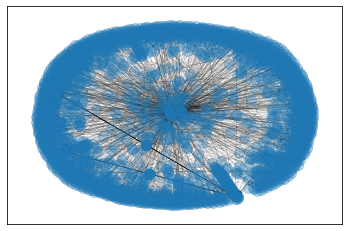

In [ ]:
nx.draw_networkx(G, with_labels=False, node_size=100, arrowsize=5, alpha=0.3, width=0.3)

In [ ]:
print("10 most influential users in Prince Philip's death are:\n\nEigenvector Centrality:\n")
sc1[:10]

10 most influential users in Prince Philip's death are:

Eigenvector Centrality:



[('RoyalFamily', 0.9444678811836785),
 ('ClarenceHouse', 0.19472491045352974),
 ('KensingtonRoyal', 0.10725489720167683),
 ('piersmorgan', 0.05414810344162327),
 ('SkyNews', 0.05102417439691422),
 ('BBCNews', 0.047900245352205176),
 ('BBCBreaking', 0.03852845821807806),
 ('superscuba83', 0.029156671083950966),
 ('MailOnline', 0.02915667108395096),
 ('TowerOfLondon', 0.02603274203924193)]

In [ ]:
print("Closeness Centrality:\n")
sc2[:10]

Closeness Centrality:



[('RoyalFamily', 0.11996943018335313),
 ('ClarenceHouse', 0.024711040255081706),
 ('KensingtonRoyal', 0.013164038034504355),
 ('piersmorgan', 0.006775607811877242),
 ('SkyNews', 0.006001922490797834),
 ('BBCNews', 0.005978477481068154),
 ('BBCBreaking', 0.004782781984854523),
 ('MailOnline', 0.0035870864886408927),
 ('superscuba83', 0.0031885213232363493),
 ('TowerOfLondon', 0.0031885213232363493)]